In [1]:
import tensorflow as tf
import numpy as np

/Users/akihiroaida/.pyenv/versions/3.6.1/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3
# y_data = x_data * 0.1+0.3 +  (.005-np.random.rand(100)*0.01)

In [3]:
from matplotlib import pyplot as plt

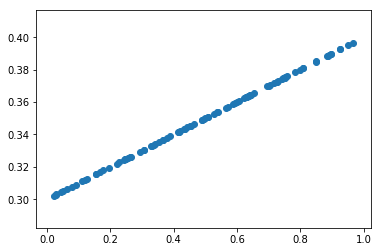

In [4]:
plt.scatter(x_data, y_data)
plt.show()

In [5]:
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but TensorFlow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

In [6]:
y.shape

TensorShape([Dimension(100)])

In [28]:
# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
# optimizer = tf.train.GradientDescentOptimizer(0.5)
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

In [37]:
train

<tf.Operation 'Adam_1' type=NoOp>

In [33]:
# Before starting, initialize the variables.  We will 'run' this first.
init = tf.global_variables_initializer()

In [34]:
# Launch the graph.
sess = tf.Session()
sess.run(init)

In [54]:
# Fit the line.
for step in range(501):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [ 0.09746657] [ 0.30135378]
20 [ 0.09789394] [ 0.30112544]
40 [ 0.09825484] [ 0.30093256]
60 [ 0.09855859] [ 0.30077025]
80 [ 0.09881335] [ 0.30063415]
100 [ 0.09902629] [ 0.30052033]
120 [ 0.09920371] [ 0.30042553]
140 [ 0.09935097] [ 0.30034682]
160 [ 0.09947279] [ 0.30028176]
180 [ 0.09957321] [ 0.30022806]
200 [ 0.09965571] [ 0.30018398]
220 [ 0.09972323] [ 0.30014792]
240 [ 0.09977829] [ 0.30011845]
260 [ 0.09982305] [ 0.30009457]
280 [ 0.09985926] [ 0.3000752]
300 [ 0.09988847] [ 0.30005959]
320 [ 0.09991197] [ 0.30004707]
340 [ 0.09993075] [ 0.30003703]
360 [ 0.09994572] [ 0.30002904]
380 [ 0.09995762] [ 0.30002263]
400 [ 0.09996705] [ 0.3000176]
420 [ 0.09997448] [ 0.30001366]
440 [ 0.09998029] [ 0.30001053]
460 [ 0.09998483] [ 0.30000809]
480 [ 0.09998839] [ 0.30000624]
500 [ 0.09999114] [ 0.30000481]


In [23]:
# Learns best fit is W: [0.1], b: [0.3]

# Close the Session when we're done.
sess.close()

# estimator

In [1]:
# NumPy is often used to load, manipulate and preprocess data.
import numpy as np
import tensorflow as tf

/Users/akihiroaida/.pyenv/versions/3.6.1/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Declare list of features. We only have one numeric feature. There are many
# other types of columns that are more complicated and useful.
feature_columns = [tf.feature_column.numeric_column("x", shape=[1])]

In [3]:
# An estimator is the front end to invoke training (fitting) and evaluation
# (inference). There are many predefined types like linear regression,
# linear classification, and many neural network classifiers and regressors.
# The following code provides an estimator that does linear regression.
estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns, model_dir='tu-model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tu-model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x117f10a90>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [4]:
# TensorFlow provides many helper methods to read and set up data sets.
# Here we use two data sets: one for training and one for evaluation
# We have to tell the function how many batches
# of data (num_epochs) we want and how big each batch should be.
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7, 0.])
input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=None, shuffle=True)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=1010, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)

In [8]:
# We can invoke 1000 training steps by invoking the  method and passing the
# training data set.
estimator.train(input_fn=input_fn, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Saving checkpoints for 1 into tu-model/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1 into tu-model/model.ckpt.


INFO:tensorflow:loss = 8.0, step = 1


INFO:tensorflow:loss = 8.0, step = 1


INFO:tensorflow:global_step/sec: 1273.85


INFO:tensorflow:global_step/sec: 1273.85


INFO:tensorflow:loss = 0.112356, step = 101 (0.081 sec)


INFO:tensorflow:loss = 0.112356, step = 101 (0.081 sec)


INFO:tensorflow:global_step/sec: 1558.11


INFO:tensorflow:global_step/sec: 1558.11


INFO:tensorflow:loss = 0.0128105, step = 201 (0.065 sec)


INFO:tensorflow:loss = 0.0128105, step = 201 (0.065 sec)


INFO:tensorflow:global_step/sec: 1568.56


INFO:tensorflow:global_step/sec: 1568.56


INFO:tensorflow:loss = 0.00124479, step = 301 (0.062 sec)


INFO:tensorflow:loss = 0.00124479, step = 301 (0.062 sec)


INFO:tensorflow:global_step/sec: 1435.55


INFO:tensorflow:global_step/sec: 1435.55


INFO:tensorflow:loss = 0.000354763, step = 401 (0.069 sec)


INFO:tensorflow:loss = 0.000354763, step = 401 (0.069 sec)


INFO:tensorflow:global_step/sec: 1450.41


INFO:tensorflow:global_step/sec: 1450.41


INFO:tensorflow:loss = 1.53746e-05, step = 501 (0.069 sec)


INFO:tensorflow:loss = 1.53746e-05, step = 501 (0.069 sec)


INFO:tensorflow:global_step/sec: 1438.33


INFO:tensorflow:global_step/sec: 1438.33


INFO:tensorflow:loss = 5.16587e-07, step = 601 (0.070 sec)


INFO:tensorflow:loss = 5.16587e-07, step = 601 (0.070 sec)


INFO:tensorflow:global_step/sec: 1492.87


INFO:tensorflow:global_step/sec: 1492.87


INFO:tensorflow:loss = 4.19839e-07, step = 701 (0.067 sec)


INFO:tensorflow:loss = 4.19839e-07, step = 701 (0.067 sec)


INFO:tensorflow:global_step/sec: 1519.02


INFO:tensorflow:global_step/sec: 1519.02


INFO:tensorflow:loss = 9.43104e-08, step = 801 (0.066 sec)


INFO:tensorflow:loss = 9.43104e-08, step = 801 (0.066 sec)


INFO:tensorflow:global_step/sec: 1837.19


INFO:tensorflow:global_step/sec: 1837.19


INFO:tensorflow:loss = 7.02613e-09, step = 901 (0.054 sec)


INFO:tensorflow:loss = 7.02613e-09, step = 901 (0.054 sec)


INFO:tensorflow:Saving checkpoints for 1000 into tu-model/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1000 into tu-model/model.ckpt.


INFO:tensorflow:Loss for final step: 1.77711e-09.


INFO:tensorflow:Loss for final step: 1.77711e-09.


In [5]:
# Here we evaluate how well our model did.
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("train metrics: %r"% train_metrics)
print("eval metrics: %r"% eval_metrics)

INFO:tensorflow:Starting evaluation at 2017-12-29-05:34:38
INFO:tensorflow:Restoring parameters from tu-model/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-12-29-05:34:38
INFO:tensorflow:Saving dict for global step 1000: average_loss = 2.06615e-10, global_step = 1000, loss = 8.26459e-10
INFO:tensorflow:Starting evaluation at 2017-12-29-05:34:39
INFO:tensorflow:Restoring parameters from tu-model/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-12-29-05:34:39
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.00252645, global_step = 1000, loss = 0.0101058
train metrics: {'average_loss': 2.0661473e-10, 'loss': 8.264589e-10, 'global_step': 1000}
eval metrics: {'average_loss': 0.0025264451, 'loss': 0.01010578, 'global_step': 1000}


In [10]:
estimator.evaluate(input_fn=tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_train, batch_size=4, num_epochs=1000, shuffle=False))

INFO:tensorflow:Starting evaluation at 2017-12-29-05:34:06


INFO:tensorflow:Starting evaluation at 2017-12-29-05:34:06


INFO:tensorflow:Restoring parameters from tu-model/model.ckpt-1000


INFO:tensorflow:Restoring parameters from tu-model/model.ckpt-1000


INFO:tensorflow:Finished evaluation at 2017-12-29-05:34:07


INFO:tensorflow:Finished evaluation at 2017-12-29-05:34:07


INFO:tensorflow:Saving dict for global step 1000: average_loss = 10.9999, global_step = 1000, loss = 43.9996


INFO:tensorflow:Saving dict for global step 1000: average_loss = 10.9999, global_step = 1000, loss = 43.9996


{'average_loss': 10.999909, 'global_step': 1000, 'loss': 43.999638}

In [6]:
# Declare list of features, we only have one real-valued feature
def model_fn(features, labels, mode):
    # Build a linear model and predict values
    W = tf.get_variable("W", [1], dtype=tf.float64)
    b = tf.get_variable("b", [1], dtype=tf.float64)
    y = W*features['x'] + b
    # Loss sub-graph
    loss = tf.reduce_sum(tf.square(y - labels))
    # Training sub-graph
    global_step = tf.train.get_global_step()
    optimizer = tf.train.GradientDescentOptimizer(0.01)
    train = tf.group(optimizer.minimize(loss),
                   tf.assign_add(global_step, 1))
    # EstimatorSpec connects subgraphs we built to the
    # appropriate functionality.
    return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=y,
        loss=loss,
        train_op=train)

In [8]:
estimator = tf.estimator.Estimator(model_fn=model_fn, model_dir='tu-model2')

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'tu-model2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11803d048>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'tu-model2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11803d048>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [9]:
# define our data sets
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7., 0.])
input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=None, shuffle=True)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)

In [10]:
# train
estimator.train(input_fn=input_fn, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Saving checkpoints for 1 into tu-model2/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1 into tu-model2/model.ckpt.


INFO:tensorflow:loss = 27.6987507651, step = 1


INFO:tensorflow:loss = 27.6987507651, step = 1


INFO:tensorflow:global_step/sec: 1302.59


INFO:tensorflow:global_step/sec: 1302.59


INFO:tensorflow:loss = 0.0866927916749, step = 101 (0.081 sec)


INFO:tensorflow:loss = 0.0866927916749, step = 101 (0.081 sec)


INFO:tensorflow:global_step/sec: 1367.13


INFO:tensorflow:global_step/sec: 1367.13


INFO:tensorflow:loss = 0.0101218353261, step = 201 (0.074 sec)


INFO:tensorflow:loss = 0.0101218353261, step = 201 (0.074 sec)


INFO:tensorflow:global_step/sec: 1382.46


INFO:tensorflow:global_step/sec: 1382.46


INFO:tensorflow:loss = 0.000420784748939, step = 301 (0.071 sec)


INFO:tensorflow:loss = 0.000420784748939, step = 301 (0.071 sec)


INFO:tensorflow:global_step/sec: 1458.87


INFO:tensorflow:global_step/sec: 1458.87


INFO:tensorflow:loss = 9.15893284795e-05, step = 401 (0.068 sec)


INFO:tensorflow:loss = 9.15893284795e-05, step = 401 (0.068 sec)


INFO:tensorflow:global_step/sec: 1567.62


INFO:tensorflow:global_step/sec: 1567.62


INFO:tensorflow:loss = 1.11521837849e-05, step = 501 (0.064 sec)


INFO:tensorflow:loss = 1.11521837849e-05, step = 501 (0.064 sec)


INFO:tensorflow:global_step/sec: 1388.21


INFO:tensorflow:global_step/sec: 1388.21


INFO:tensorflow:loss = 7.25522715711e-07, step = 601 (0.070 sec)


INFO:tensorflow:loss = 7.25522715711e-07, step = 601 (0.070 sec)


INFO:tensorflow:global_step/sec: 1485.9


INFO:tensorflow:global_step/sec: 1485.9


INFO:tensorflow:loss = 7.17297701234e-08, step = 701 (0.068 sec)


INFO:tensorflow:loss = 7.17297701234e-08, step = 701 (0.068 sec)


INFO:tensorflow:global_step/sec: 1495.8


INFO:tensorflow:global_step/sec: 1495.8


INFO:tensorflow:loss = 3.70138341427e-09, step = 801 (0.067 sec)


INFO:tensorflow:loss = 3.70138341427e-09, step = 801 (0.067 sec)


INFO:tensorflow:global_step/sec: 1502.02


INFO:tensorflow:global_step/sec: 1502.02


INFO:tensorflow:loss = 2.17386341854e-10, step = 901 (0.067 sec)


INFO:tensorflow:loss = 2.17386341854e-10, step = 901 (0.067 sec)


INFO:tensorflow:Saving checkpoints for 1000 into tu-model2/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1000 into tu-model2/model.ckpt.


INFO:tensorflow:Loss for final step: 5.22561163255e-11.


INFO:tensorflow:Loss for final step: 5.22561163255e-11.


In [11]:
# Here we evaluate how well our model did.
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("train metrics: %r"% train_metrics)
print("eval metrics: %r"% eval_metrics)

INFO:tensorflow:Starting evaluation at 2017-12-29-05:36:51


INFO:tensorflow:Starting evaluation at 2017-12-29-05:36:51


INFO:tensorflow:Restoring parameters from tu-model2/model.ckpt-1000


INFO:tensorflow:Restoring parameters from tu-model2/model.ckpt-1000


INFO:tensorflow:Finished evaluation at 2017-12-29-05:36:52


INFO:tensorflow:Finished evaluation at 2017-12-29-05:36:52


INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 5.42607e-11


INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 5.42607e-11


INFO:tensorflow:Starting evaluation at 2017-12-29-05:36:52


INFO:tensorflow:Starting evaluation at 2017-12-29-05:36:52


INFO:tensorflow:Restoring parameters from tu-model2/model.ckpt-1000


INFO:tensorflow:Restoring parameters from tu-model2/model.ckpt-1000


INFO:tensorflow:Finished evaluation at 2017-12-29-05:36:53


INFO:tensorflow:Finished evaluation at 2017-12-29-05:36:53


INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 0.0101017


INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 0.0101017


train metrics: {'loss': 5.4260655e-11, 'global_step': 1000}
eval metrics: {'loss': 0.010101673, 'global_step': 1000}
